In [2]:
from alphaengine import loaders, stats, transforms
import numpy as np
import talib as ta

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
gld = loaders.FileInstrument('../../../Developer/Data/prices/AMEX/GLD.csv')

In [5]:
gld['close']

array([ 44.38,  44.78,  44.95, ..., 146.86, 146.03, 146.91])

In [6]:
def rolling_window(a, window_size):
    shape = (a.shape[0] - window_size + 1, window_size) + a.shape[1:]
    strides = (a.strides[0],) + a.strides
    x = np.ones((window_size - 1, window_size)) * np.nan
    return np.vstack((x, np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)))

In [7]:
x = rolling_window(gld['close'], window_size=100)

In [8]:
x

array([[   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       ...,
       [141.4 , 144.17, 144.19, ..., 147.39, 147.97, 146.86],
       [144.17, 144.19, 145.57, ..., 147.97, 146.86, 146.03],
       [144.19, 145.57, 145.16, ..., 146.86, 146.03, 146.91]])

In [9]:
gld

array([[ 1.80000e+01,  1.10000e+01,  2.00400e+03, ...,  4.43800e+01,
         5.99150e+06,  4.00000e-01],
       [ 1.90000e+01,  1.10000e+01,  2.00400e+03, ...,  4.47800e+01,
         1.16553e+07,  1.70000e-01],
       [ 2.20000e+01,  1.10000e+01,  2.00400e+03, ...,  4.49500e+01,
         1.19960e+07, -2.00000e-01],
       ...,
       [ 8.00000e+00,  1.00000e+00,  2.02000e+03, ...,  1.46860e+02,
         2.22763e+07, -8.30000e-01],
       [ 9.00000e+00,  1.00000e+00,  2.02000e+03, ...,  1.46030e+02,
         1.03043e+07,  8.80000e-01],
       [ 1.00000e+01,  1.00000e+00,  2.02000e+03, ...,  1.46910e+02,
         6.18390e+06,  0.00000e+00]])

In [10]:
d = np.diff(gld['close'], prepend=gld['close'][0])

In [11]:
gld.attach_feature(d, 'back_returns')

In [15]:
p = rolling_window(gld['back_returns'], window_size=100)

(array([ 1.,  0.,  0.,  2.,  1.,  1.,  7.,  3.,  7.,  9., 10., 22.,  6.,
        12.,  6.,  3.,  7.,  1.,  1.,  1.]),
 array([-1.1  , -1.004, -0.908, -0.812, -0.716, -0.62 , -0.524, -0.428,
        -0.332, -0.236, -0.14 , -0.044,  0.052,  0.148,  0.244,  0.34 ,
         0.436,  0.532,  0.628,  0.724,  0.82 ]),
 <a list of 20 Patch objects>)

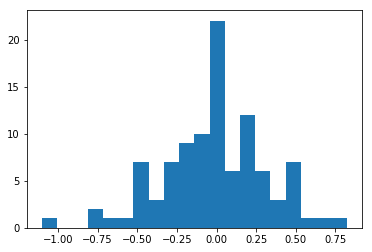

In [18]:
plt.hist(p[100], bins=20)

In [121]:
draws = np.random.choice(p[100], size=(10, 1000))

In [122]:
x = np.add.accumulate(draws)[-1]

In [123]:
np.mean(x)

-0.25123000000000073

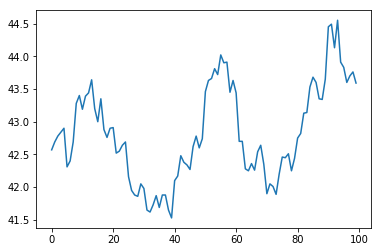

In [67]:
plt.plot(gld['close'][100:200])

In [69]:
draws = np.stack([np.random.choice(pp, size=(10, 1000)) for pp in p])

In [76]:
x = np.add.accumulate(draws, axis=1)

In [85]:
x.shape

(3952, 10, 1000)

In [88]:
x[1].shape

(10, 1000)

In [103]:
means = np.stack([np.mean(xx[-1]) for xx in x])

In [104]:
means[100]

-0.16419000000000034

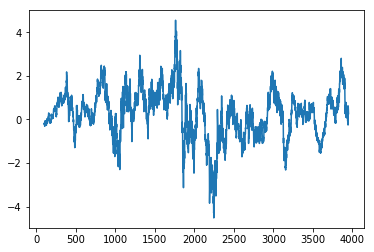

In [105]:
plt.plot(means)

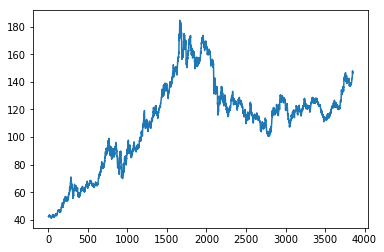

In [106]:
plt.plot(gld['close'][100:])

In [113]:
rt = rolling_window(gld['close'], window_size=100)

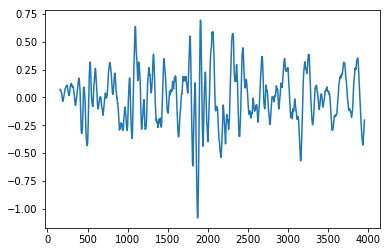

In [128]:
plt.plot(ta.SMA(np.diff(ta.SMA((rt[:,-1] - rt[:,0])))))